# Aufgabe 2

Alfredo - stolzer Besitzer der Pizzeria Bella Capri - möchte seine Prozesse verbessern. Zum Beispiel:

 1. möchte er abschätzen können, wie viele Pizzas, wie viel frischen Salat und wie viele Nudeln er pro Tag benötigt. 
 2. Desweiteren möchte er gerne abschätzen, was er an verschiedenen Getränken besorgen muss.
 3. Da die Zahl der täglichen Gäste vermutlich schwer genau vorherzusagen ist überlegt er, ob es wohl einen (linearen) Zusammenhang 
    zwischen den Vorab-Reservierungen und der Gesamtzahl der Gäste pro Tag gibt, so dass er Anhand der Reservierungen eine Vorhersage 
    über die zu erwartende Gesamtzahl der Gäste treffen kann.
 4. Außerdem möchte er entscheiden, an welchem Tag er zukünftig Ruhetag machen soll.

Dazu erstellt er über einen Monat hinweg die Tabelle "BellaCapri.xlsx" und hofft dass er einen Datenanalysten findet, der ihm seine 
Fragen mit Hilfe eines Computerprogramms beantworten kann.

Können Sie Alfredo helfen und ihm ein paar nützliche Analysen und Graphiken mit Hilfe von Pandas, NumPy und Matplotlib erstellen?

Hinweis: die Aufgabe lässt Gestaltungsspielraum. Ich bin gespannt auf ihre individuellen Lösungen.

Quelldatei:

BellaCapri.xlsx

## I. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## II. Functions and Definitions for Evaluation Metrics and Plotting

### Evaluation Metrics

#### R-Score

$$R^2 = 1 - \frac{u}{v}$$
$$u = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
$$v = \sum_{i=1}^{n} (y_i - \bar{y})^2$$

Where:


- $y_i$ = true value of sample $i$
- $\hat{y}_i$ = predicted value of sample $i$
- $\bar{y}$ = mean of true values
- $n$ = number of samples

perfect modell: $R=1$ <br>
constant model with y=Mean: $R=0$

In [2]:
def calc_r_score(y, y_pred):
    """Takes two numpy arrays as input. Returns the R Score."""
    # calc u and v
    u = np.sum((y - y_pred)**2)
    v = np.sum((y - np.mean(y))**2)

    # calc R score
    R2 = 1 - u / v
    
    return R2

#### Root Mean Square Error (RMSE)

$$RMSE =  \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

Where:

- $y_i$ = true value of sample $i$
- $\hat{y}_i$ = predicted value of sample $i$  
- $n$ = number of samples


In [3]:
def calc_rmse(y, y_pred):
    """Takes two nuumpy arrays as input. Returns RMSE."""
    return np.sqrt(np.mean((y - y_pred)**2))

#### K-Fold Cross Validation

Dataset has 56 entries. The value k = 4 is chosen, so the dataset will be devided into 4 folds of 14 entries.
Training will be performed with 3 of 4 folds. Validation is done with the remaining fold. <br>
The four iterations are shown below:

| **Iteration**   |            | Fold 1   | Fold 2   | Fold 3   | Fold 4   |
|:----------------|------------|:--------:|:--------:|:--------:|:--------:|
| **Iteration 1** | **Fold 1** | *Test*   | Training | Training | Training |
| **Iteration 2** | **Fold 2** | Training | *Test*   | Training | Training |
| **Iteration 3** | **Fold 3** | Training | Training | *Test*   | Training |
| **Iteration 4** | **Fold 4** | Training | Training | Training | *Test*   |



Define function for cross validation:

In [4]:
def cross_validate(x, y, k):
    """"""
    # length of array
    n = len(x)
    
    # create shuffled indices
    indices = np.arange(n)
    np.random.seed(22)
    np.random.shuffle(indices)

    # split in folds
    folds = np.array_split(indices, k)

    models = []
    r_scores = []
    rmses = []
    
    for i in range(k):
        # define testing and training for this iteration
        test_ids = folds[i]
        train_ids = np.hstack([folds[j] for j in range(k) if j != i])

        # training
        x_train = x[train_ids]
        y_train = y[train_ids]
        
        # testing
        x_test = x[test_ids]
        y_test = y[test_ids]
    
        # model
        model = np.poly1d(np.polyfit(x=x_train, y=y_train, deg=1)) # polyfit fits and poly1d turns it to a function
        
        # prediction
        y_pred = res_cus_model(x_test)

        # R-score and RMSE
        r_score = calc_r_score(y=y_test, y_pred=y_pred)
        rmse = calc_rmse(y=y_test, y_pred=y_pred)

        # result
        models.append(model)
        r_scores.append(r_score)
        rmses.append(rmse)

    return models, r_scores, rmses

### Plotting

#### Definitions

Set Style

In [5]:
plt.style.use('seaborn-v0_8-darkgrid')

Define Colors

In [6]:
# data
colors = {
    'Reservierungen'    : '#ff7f0e',
    'Besucher'          : 'green',
    'Pizza'             : '#f4a261', 
    'Pasta'             : '#e76f51',
    'Salat'             : '#2a9d8f',
    'Vorspeise'         : '#e9c46a',
    'Sonst. Gerichte'   : '#1f77b4',
    'Ges. Gerichte'     : '#f4a261',
    'Mineralwasser'     : '#a8dadc',
    'Apfelschorle'      : '#f4a261',
    'Cola'              : '#e76f51',
    'Bier'              : '#2a9d8f',
    'Wein'              : '#8d3b72',
    'Sonst. Getränke'   : '#e377c2',
    'Nicht-Alkoholisch' : '#1f77b4',
    'Alkoholisch'       : '#7f7f7f',
    'Ges. Getränke'     : '#a8dadc',
    'Ges. Bestellungen' : '#9467bd',
}

In [7]:
# cross validation
colors_cv = ['#ff7f0e', '#1f77b4', '#2ca02c',  '#9467bd']

Mapping for plot labels

In [8]:
weekdays = {
    'Mo' : 'Montag',
    'Di' : 'Dienstag',
    'Mi' : 'Mittwoch',
    'Do' : 'Donnerstag',
    'Fr' : 'Freitag',
    'Sa' : 'Samstag',
    'So' : 'Sonntag',
}

#### Functions

Creating a line subplot for given DataFrame and columns

In [9]:
def create_subplot(ax, df, c_names, title):
    """Takes axis, DataFrame, list of columns to plot and the title as input.
    Creates a linear plot for each column on the axis."""
    # plot data
    for c_name in c_names:
        ax.plot(df.index, df[c_name], color=colors[c_name], label=c_name)  

    # set axis labels
    ax.set_xlabel('Datum')
    ax.set_ylabel('Anzahl')

    # set clear ticks
    week_starts = list(df.index[::7])
    ax.set_xticks(week_starts); # set ticks
    ax.set_xticklabels(week_starts); # set labels

    # set title and legend
    ax.set_title(title)
    ax.legend(loc='upper left');

In [10]:
def create_box_subplots(ax, df, c_name):
    """Takes axis, DataFrame amd column name as input.
    Creates a box plot for each day for given column on the axis."""
    # data for each day
    day_data = [df.loc[df['Wochentag'] == wd, c_name].values for wd in weekday_order]

    # boxplot
    bp = ax.boxplot(day_data, patch_artist=True, tick_labels=weekday_order)

    # Boxfarben setzen
    for patch in bp['boxes']:
        patch.set_facecolor(colors[c_name])

    # Median schwarz
    for median in bp['medians']:
        median.set_color("black")
        median.set_linewidth(2)

    ax.set_title(c_name)
    ax.set_xlabel("Wochentag")
    ax.set_ylabel("Anzahl")
    ax.tick_params(axis='x', rotation=30)

In [11]:
def calc_error_band(y_values):
    """Takes 2d numpy array as input.
    Returns two arrays lower, upper with the smalest and greates value for every index (axis=0)."""
    lower = y_values.min(axis=0)  # shape: (n,)
    upper = y_values.max(axis=0)  # shape: (n,)

    return lower, upper    

## III. Load Data

Excel file has two sheets, 'Gerichte' and 'Getränke'. Date ('Datum') can be used as index.

In [12]:
food = pd.read_excel('BellaCapri.xlsx', sheet_name='Gerichte', index_col='Datum')
drinks = pd.read_excel('BellaCapri.xlsx', sheet_name='Getränke', index_col='Datum')

## Get Basic Understanding

Check what the data looks like and if it's complete.
What are the relvant columns?
How can the data be structured?

1. Check basic information
2. Take a look at the dataframe
3. Plot data

### Basic Information

In [13]:
display(food.info())
print('')
display(drinks.info())

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 01.02.21 to 28.03.21
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Wochentag       56 non-null     object
 1   Reservierungen  56 non-null     int64 
 2   Besucher        56 non-null     int64 
 3   Pizza           56 non-null     int64 
 4   Pasta           56 non-null     int64 
 5   Salat           56 non-null     int64 
 6   Vorspeise       56 non-null     int64 
 7   Sonstiges       56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.9+ KB


None


<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 01.02.21 to 28.03.21
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Wochentag      56 non-null     object
 1   Mineralwasser  56 non-null     int64 
 2   Apfelschorle   56 non-null     int64 
 3   Cola           56 non-null     int64 
 4   Bier           56 non-null     int64 
 5   Wein           56 non-null     int64 
 6   Sonstiges      56 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.5+ KB


None

- both dataframes have the same length with 56 enties from 01.02 to 28.03
- both are complete (no NaNs)
- drinks is missing the reservations and customers column

### Adjust DataFrames

--> add reservations and customers to drinks 

In [14]:
drinks = pd.concat([food[['Wochentag', 'Reservierungen', 'Besucher']], drinks.drop(['Wochentag'], axis=1)], axis=1)

--> create new columns with sum of food and drinks

In [15]:
food['Ges. Gerichte'] = food.drop(['Wochentag', 'Reservierungen', 'Besucher'], axis=1).sum(axis=1)
drinks['Ges. Getränke'] = drinks.drop(['Wochentag', 'Reservierungen', 'Besucher'], axis=1).sum(axis=1)

--> rename columns

In [16]:
food.rename(columns={'Sonstiges': 'Sonst. Gerichte'}, inplace=True)     
drinks.rename(columns={'Sonstiges': 'Sonst. Getränke'}, inplace=True)

--> create two categories for drinks: 'Nicht Alkoholisch', 'Alkoholisch'

In [17]:
drinks['Nicht-Alkoholisch'] = drinks[['Mineralwasser', 'Apfelschorle', 'Cola']].sum(axis=1)
drinks['Alkoholisch'] = drinks[['Bier', 'Wein']].sum(axis=1)

--> Reorder drinks

In [18]:
drinks = drinks.loc[:, ['Wochentag', 'Reservierungen', 'Besucher', 'Mineralwasser', 'Apfelschorle', 'Cola', 'Bier', 'Wein', 'Sonst. Getränke', 'Nicht-Alkoholisch', 'Alkoholisch',  'Ges. Getränke']]

--> one DataFrame with everything and total orders

In [19]:
food_n_drinks = food.join(drinks.drop(['Wochentag', 'Reservierungen', 'Besucher'], axis=1), how="left")
food_n_drinks['Ges. Bestellungen'] = food_n_drinks['Ges. Gerichte'] + food_n_drinks['Ges. Getränke']

--> DataFrame for weekdays

In [20]:
# sum per weekday
food_n_drinks_wd = food_n_drinks.groupby('Wochentag').sum()

# sort weekdays
weekday_order = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
food_n_drinks_wd = food_n_drinks_wd.reindex(weekday_order)

### DataFrame

In [21]:
display(food.head(8))
display(drinks.head(8))
display(food_n_drinks.head(8))
display(food_n_drinks_wd)

,Wochentag,Reservierungen,Besucher,Pizza,Pasta,Salat,Vorspeise,Sonst. Gerichte,Ges. Gerichte
Datum,,,,,,,,,
01.02.21,Mo,10,127,56,32,23,52,16,179
02.02.21,Di,10,71,33,15,12,16,11,87
03.02.21,Mi,14,153,55,41,30,29,27,182
04.02.21,Do,16,226,82,53,47,81,44,307
05.02.21,Fr,27,299,115,76,60,81,48,380
06.02.21,Sa,29,415,167,102,80,122,66,537
07.02.21,So,25,231,90,53,43,63,45,294
08.02.21,Mo,10,135,60,35,26,32,14,167


,Wochentag,Reservierungen,Besucher,Mineralwasser,Apfelschorle,Cola,Bier,Wein,Sonst. Getränke,Nicht-Alkoholisch,Alkoholisch,Ges. Getränke
Datum,,,,,,,,,,,,
01.02.21,Mo,10,127,73,47,50,49,78,22,170,127,319
02.02.21,Di,10,71,46,30,28,26,43,15,104,69,188
03.02.21,Mi,14,153,94,64,59,60,91,27,217,151,395
04.02.21,Do,16,226,140,93,92,92,132,43,325,224,592
05.02.21,Fr,27,299,178,120,120,119,177,58,418,296,772
06.02.21,Sa,29,415,247,164,163,168,246,81,574,414,1069
07.02.21,So,25,231,142,88,94,94,137,43,324,231,598
08.02.21,Mo,10,135,80,52,52,55,83,28,184,138,350


,Wochentag,Reservierungen,Besucher,Pizza,Pasta,Salat,Vorspeise,Sonst. Gerichte,Ges. Gerichte,Mineralwasser,Apfelschorle,Cola,Bier,Wein,Sonst. Getränke,Nicht-Alkoholisch,Alkoholisch,Ges. Getränke,Ges. Bestellungen
Datum,,,,,,,,,,,,,,,,,,,
01.02.21,Mo,10,127,56,32,23,52,16,179,73,47,50,49,78,22,170,127,319,498
02.02.21,Di,10,71,33,15,12,16,11,87,46,30,28,26,43,15,104,69,188,275
03.02.21,Mi,14,153,55,41,30,29,27,182,94,64,59,60,91,27,217,151,395,577
04.02.21,Do,16,226,82,53,47,81,44,307,140,93,92,92,132,43,325,224,592,899
05.02.21,Fr,27,299,115,76,60,81,48,380,178,120,120,119,177,58,418,296,772,1152
06.02.21,Sa,29,415,167,102,80,122,66,537,247,164,163,168,246,81,574,414,1069,1606
07.02.21,So,25,231,90,53,43,63,45,294,142,88,94,94,137,43,324,231,598,892
08.02.21,Mo,10,135,60,35,26,32,14,167,80,52,52,55,83,28,184,138,350,517


,Reservierungen,Besucher,Pizza,Pasta,Salat,Vorspeise,Sonst. Gerichte,Ges. Gerichte,Mineralwasser,Apfelschorle,Cola,Bier,Wein,Sonst. Getränke,Nicht-Alkoholisch,Alkoholisch,Ges. Getränke,Ges. Bestellungen
Wochentag,,,,,,,,,,,,,,,,,,
Mo,76,1083,431,263,202,329,187,1412,628,422,427,428,650,211,1477,1078,2766,4178
Di,63,913,363,222,176,312,152,1225,547,352,357,358,545,178,1256,903,2337,3562
Mi,82,1125,445,267,220,289,193,1414,650,449,440,439,671,211,1539,1110,2860,4274
Do,139,1797,728,442,350,547,277,2344,1079,723,718,721,1073,354,2520,1794,4668,7012
Fr,195,2129,861,518,418,586,332,2715,1273,843,841,845,1264,423,2957,2109,5489,8204
Sa,234,2943,1174,725,578,840,466,3783,1764,1167,1162,1170,1754,581,4093,2924,7598,11381
So,182,1911,779,463,373,540,296,2451,1134,750,753,752,1135,372,2637,1887,4896,7347


- data available for the whole week

### Simple Plots of the relevant Data

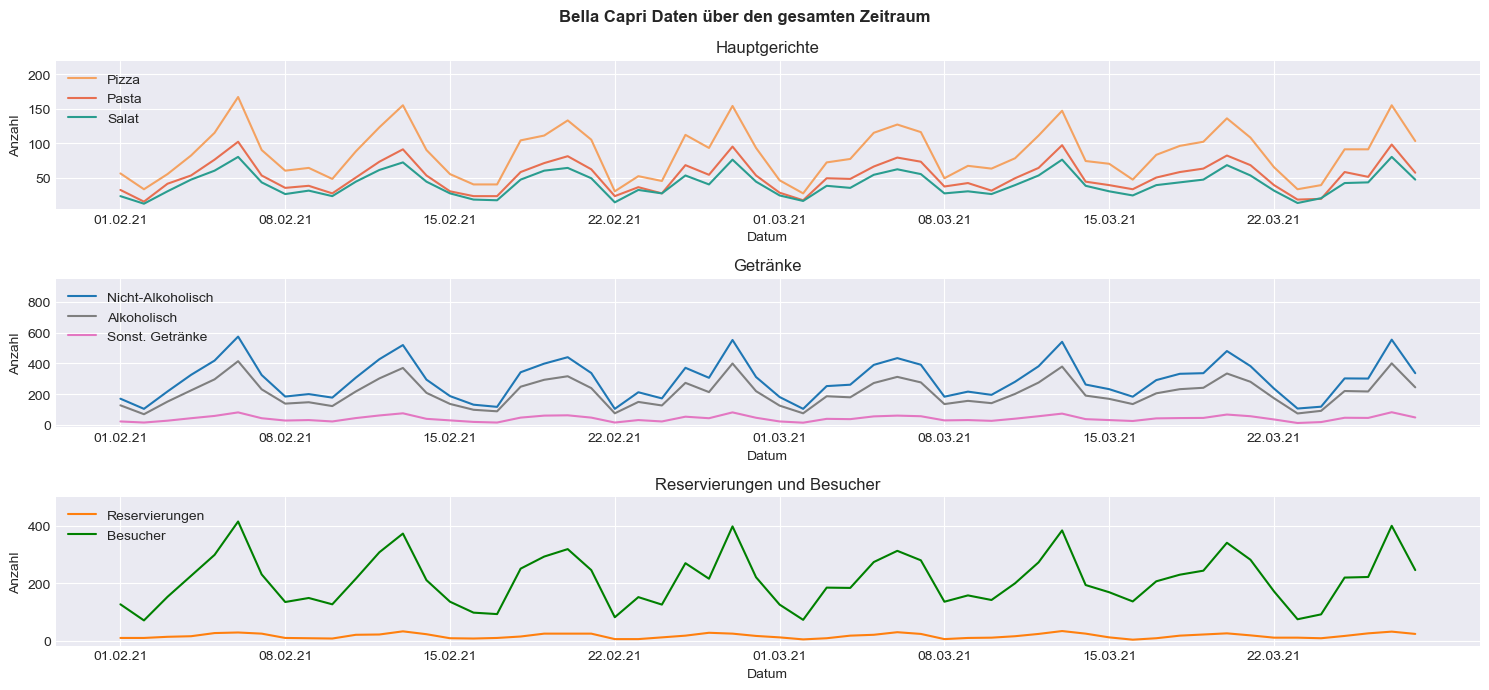

In [22]:
# create figure
fig, (ax_food, ax_drinks, ax_food_n_drinks) = plt.subplots(3, 1, figsize=(15, 7))

create_subplot(ax_food, food, ['Pizza', 'Pasta', 'Salat'], 'Hauptgerichte') # to crowded with 'Vorspeise' and 'Sonstiges'
create_subplot(ax_drinks, drinks, ['Nicht-Alkoholisch',	'Alkoholisch', 'Sonst. Getränke'], 'Getränke')
create_subplot(ax_food_n_drinks, food_n_drinks, ['Reservierungen', 'Besucher'], 'Reservierungen und Besucher')

# fix legends
ax_food.set_ylim(top=220)
ax_drinks.set_ylim(top=950)
ax_food_n_drinks.set_ylim(top=500)

plt.suptitle("Bella Capri Daten über den gesamten Zeitraum", weight='bold')
plt.tight_layout()

- dependence between customers and food/drinks is obvious
- dependence between reservations and customers seems to be existent to some extent
- variation for weekdays is significantly larger then for the reservations
- further analysis on the matter has to be done to decide

## 1. Model Food

Define columns

In [23]:
food_cols = ['Pizza', 'Pasta', 'Salat', 'Vorspeise', 'Sonst. Gerichte']

Plot the data

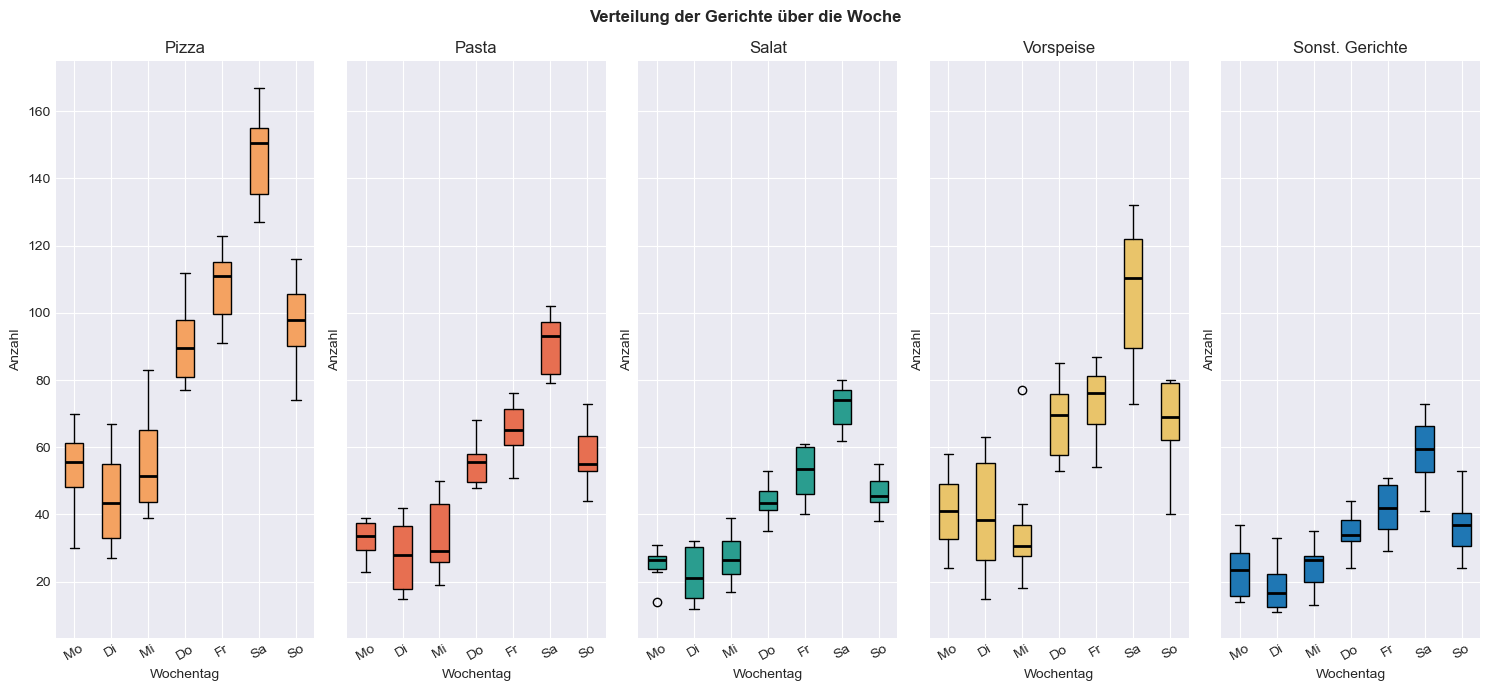

In [24]:
fig, axes = plt.subplots(1, 5, figsize=(15, 7), sharey=True)

# plot each food
for ax, c_name in zip(axes, food_cols):
    create_box_subplots(ax, food, c_name)

plt.suptitle("Verteilung der Gerichte über die Woche", weight='bold')

plt.tight_layout()

## 2. Model Drinks

In [25]:
drink_cols = ['Mineralwasser', 'Apfelschorle', 'Cola', 'Bier', 'Wein', 'Sonst. Getränke']

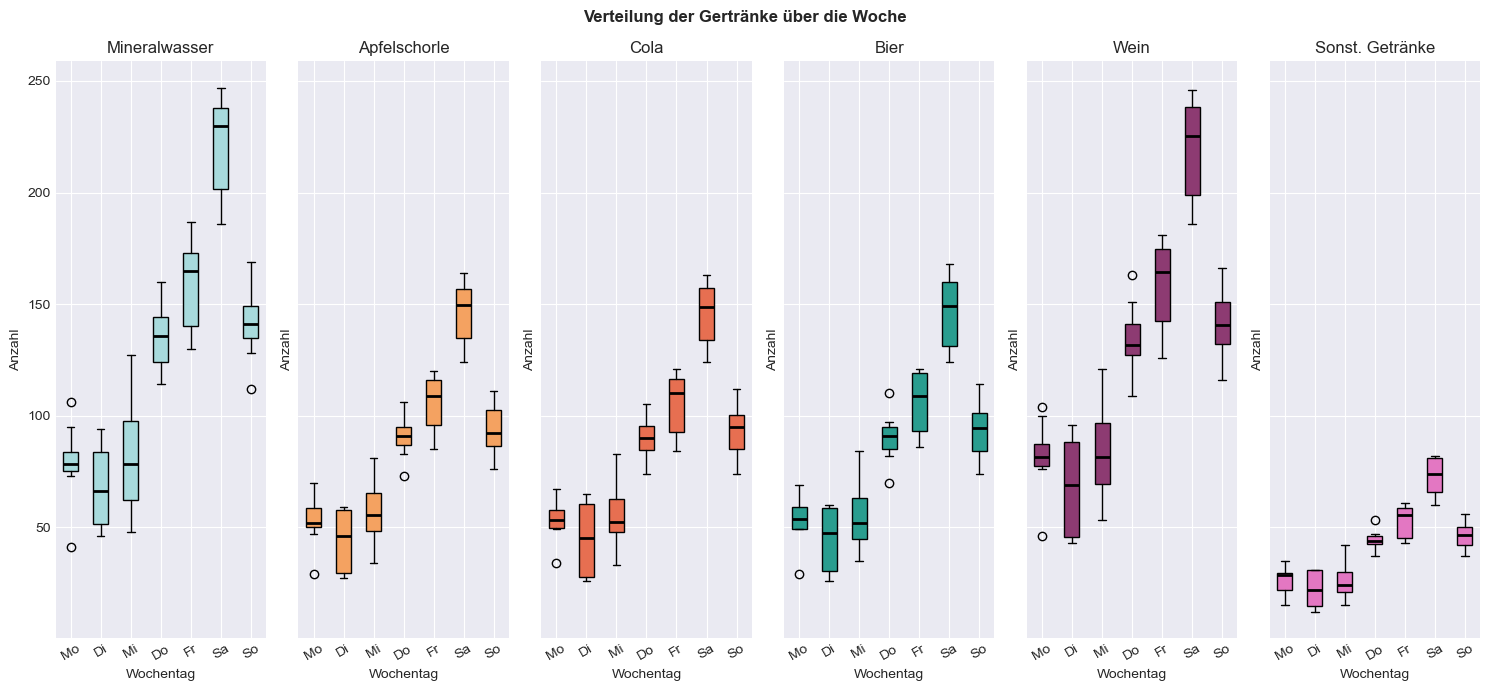

In [26]:
fig, axes = plt.subplots(1, 6, figsize=(15, 7), sharey=True)

# plot each food
for ax, c_name in zip(axes, drink_cols):
    create_box_subplots(ax, drinks, c_name)

plt.suptitle("Verteilung der Gertränke über die Woche", weight='bold')

plt.tight_layout()

## 3. Analyse Dependence between Reservations and Customers

1. Split Data for K-Fold Cross Validation
2. Calculate Regreessions and R-Score
3. Plot data

### Regression

Get x for total range:

In [27]:
# x and y values for linear functions
x = np.array(range(food_n_drinks.Reservierungen.min(), food_n_drinks.Reservierungen.max()+1)) # use food for complete range

#### Linear Regression

In [28]:
# train model on whole dataset
res_cus_model = np.poly1d(np.polyfit(x=food_n_drinks.Reservierungen, y=food_n_drinks.Besucher, deg=1)) # polyfit fits and poly1d turns it to a function
y_pred = res_cus_model(x)

#### Calculate R-Score and RMSE for whole dataset:

In [29]:
x_values = food_n_drinks.Reservierungen.values
y_values = food_n_drinks.Besucher.values
y_pred_values = res_cus_model(x_values)

r_score = round(calc_r_score(y_values, y_pred_values), 4)
rmse = round(calc_rmse(y_values, y_pred_values))

#### Cross Validation

Cross validate:

In [30]:
models, r_scores, rmses = cross_validate(x_values, y_values, 4)

In [31]:
r_score_cv = round(np.mean(r_scores), 4)
rmse_cv = round(np.mean(rmses))

In [32]:
y_values_models = [model(x) for model in models]

#### Plot Result

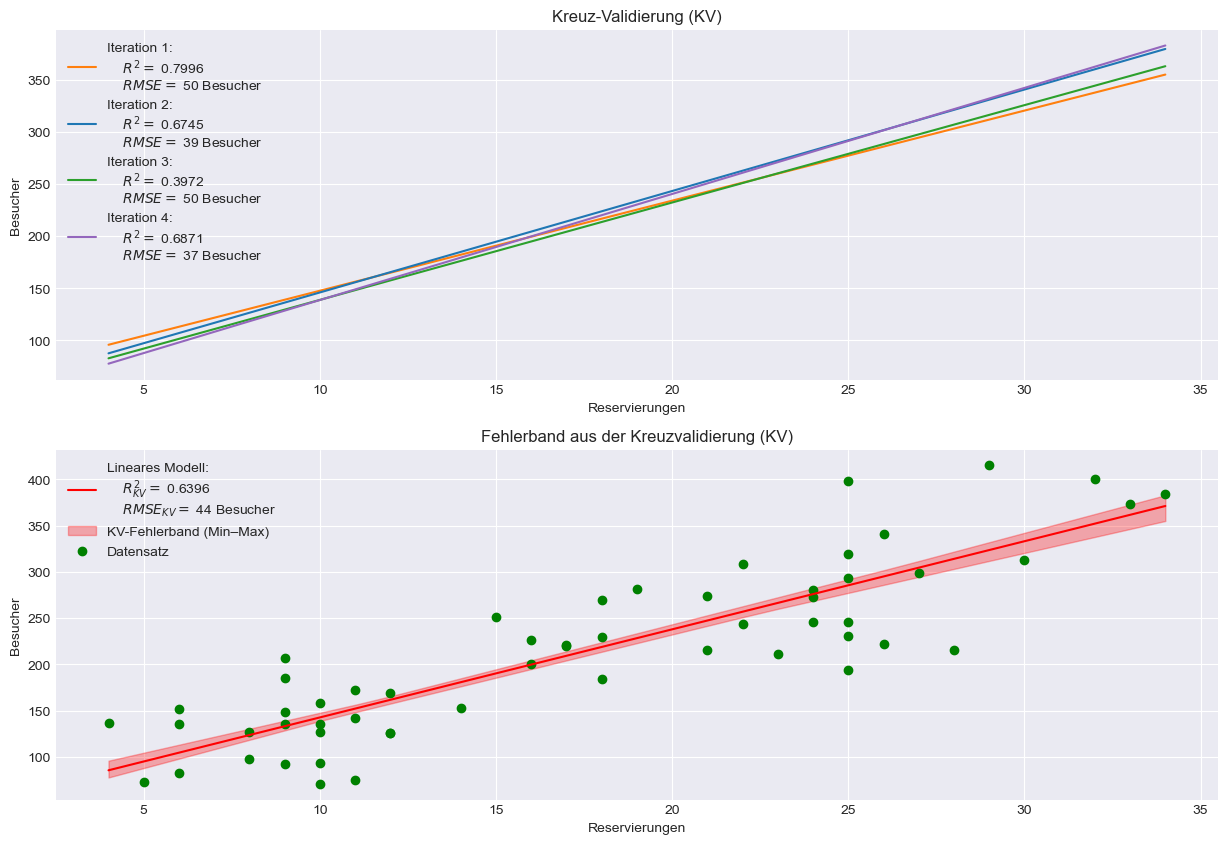

In [34]:
fig, (ax_cv, ax_error_band) = plt.subplots(2, 1, figsize=(15, 10))

# defien neccesary varibales
model_label = f'''Lineares Modell:
    $R^2_{{KV}} =$ {r_score_cv}
    $RMSE_{{KV}} =$ {rmse_cv} Besucher''' # label for linear model
lower, upper = calc_error_band(np.array(y_values_models)) # lower and upper border for error band

# cross validation
for i, y_values_model in enumerate(y_values_models):
    ax_cv.plot(x, y_values_model, color=colors_cv[i], label=f'Iteration {i+1}:\n    $R^2 =$ {round(r_scores[i], 4)}\n    $RMSE =$ {round(rmses[i])} Besucher')

# error band
ax_error_band.plot(x, y_pred, color='red', label=model_label)  # linear model
ax_error_band.fill_between(x, lower, upper, color='red', alpha=0.3, label="KV-Fehlerband (Min–Max)") # error band
ax_error_band.scatter(x_values, y_values, color=colors['Besucher'], label='Datensatz')  # data

# set labels and legend
ax_cv.set_title("Kreuz-Validierung (KV)")
ax_error_band.set_title("Fehlerband aus der Kreuzvalidierung (KV)")

for ax in [ax_cv, ax_error_band]:
    # set axis labels
    ax.set_xlabel('Reservierungen')
    ax.set_ylabel('Besucher')
    
    # set legend
    ax.legend()
    ax.legend(loc='upper left')

## 4. Decide what day should be rest day

### Check which day has the lowest number of anything.

In [35]:
mins_wd_values = food_n_drinks_wd.drop('Reservierungen', axis=1).min()
mins_wd_day = food_n_drinks_wd.idxmin()
display(mins_wd_day)

Reservierungen       Di
Besucher             Di
Pizza                Di
Pasta                Di
Salat                Di
Vorspeise            Mi
Sonst. Gerichte      Di
Ges. Gerichte        Di
Mineralwasser        Di
Apfelschorle         Di
Cola                 Di
Bier                 Di
Wein                 Di
Sonst. Getränke      Di
Nicht-Alkoholisch    Di
Alkoholisch          Di
Ges. Getränke        Di
Ges. Bestellungen    Di
dtype: object

Tuesday should obviously be closing day.

### Check the relation of Tuesday to the other weekdays

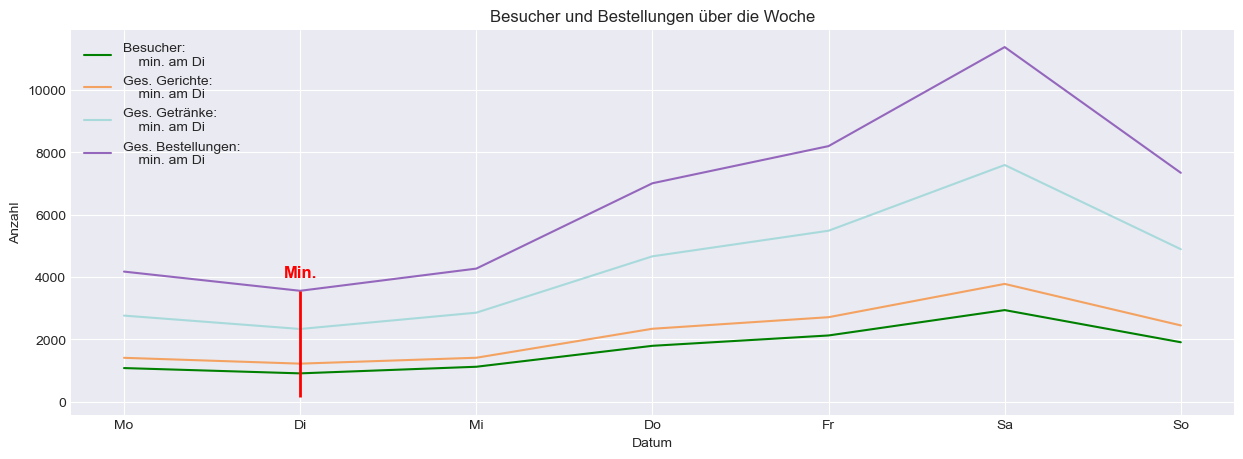

In [37]:
# create figure
fig, ax = plt.subplots(figsize=(15, 5))

# plot data
for c_name in  ['Besucher', 'Ges. Gerichte', 'Ges. Getränke', 'Ges. Bestellungen']:
    ax.plot(food_n_drinks_wd.index, food_n_drinks_wd[c_name], color=colors[c_name], label=f'{c_name}:\n    min. am {mins_wd_day[c_name]}')  

# vertical line on tuesday
x_pos = 'Di'
y_min = mins_wd_values.min()
y_max = mins_wd_values.max()

ax.vlines(x=x_pos, ymin=y_min, ymax=y_max, color='red', linewidth=2)
ax.text(x_pos, 4000, "Min.", color="red", fontsize=12, ha='center', fontweight="bold")

# set axis labels
ax.set_xlabel('Datum')
ax.set_ylabel('Anzahl')

# set title and legend
ax.set_title('Besucher und Bestellungen über die Woche')
ax.legend(loc='upper left');

As we have learned, Tuesday should be closing day. But business is also slow on Mondays and Wednesdays. As we have only 8 datapoints for each day, it is also possible that Monday or Wednesday would be the better choise. Alfredo can choose which of the three days suits him best, with Tuesday beeing my recommendation.